# Clase 4 - Evaluación modelo logistico

## Librerias

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

## Ejercicio



Carga del dataset

In [31]:
cancer_datos = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer_datos["data"], columns=cancer_datos["feature_names"])
cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})
cancer_df["objetivo"].value_counts(True)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


**Modelo**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X_train,y_train)
predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [34]:
predicciones_probabilidades = modelo.predict_proba(X_test)
predicciones_probabilidades

array([[8.15714037e-01, 1.84285963e-01],
       [4.18623336e-09, 9.99999996e-01],
       [2.28634155e-03, 9.97713658e-01],
       [9.96494209e-01, 3.50579099e-03],
       [9.99045853e-01, 9.54146911e-04],
       [4.79454920e-10, 1.00000000e+00],
       [9.20152843e-13, 1.00000000e+00],
       [1.09832669e-02, 9.89016733e-01],
       [9.96622137e-01, 3.37786321e-03],
       [9.85580444e-01, 1.44195564e-02],
       [9.30165060e-01, 6.98349400e-02],
       [5.76476149e-04, 9.99423524e-01],
       [9.88858332e-01, 1.11416676e-02],
       [1.46840455e-01, 8.53159545e-01],
       [9.96710736e-01, 3.28926432e-03],
       [1.96935093e-03, 9.98030649e-01],
       [9.96574023e-01, 3.42597666e-03],
       [9.99616871e-01, 3.83129465e-04],
       [9.97869585e-01, 2.13041510e-03],
       [7.79640427e-08, 9.99999922e-01],
       [8.40610203e-01, 1.59389797e-01],
       [9.83108935e-01, 1.68910650e-02],
       [7.02113701e-10, 9.99999999e-01],
       [9.92994304e-01, 7.00569617e-03],
       [9.862076

### Funciones para el calculo de Verdaderos positivos, verdaderos negativos, falsos positivos, falsos negativos

In [35]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales,predicciones)

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 

In [36]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==0])
    
def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==0 and obs[1]==1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0]==1 and obs[1]==0])

In [37]:
print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)    
))


Verdaderos Positivos: 59
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 4



Exactitud y Precision del modelo

In [38]:
#MEDIDA DE LA EXACTITUD
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

print("Exactitud:",exactitud(clases_reales, predicciones))

#MEDIDA DE PRESICION
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp+fp)

#PARA SOLO UNA CLASIFICACION
print("Precision:",precision(clases_reales, predicciones))

#PARA MAS CLASIFICACIONES
print("Precicion de SKlearn:",metrics.average_precision_score(clases_reales, predicciones))

Exactitud: 0.9649122807017544
Precision: 0.9672131147540983
Precicion de SKlearn: 0.9291945711272717


Sensibilidad del modelo

In [39]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp+fn)

print("Sensibilidad: ",sensibilidad(clases_reales, predicciones))
print("Sensibilidad de SKLEARN: ", metrics.recall_score(clases_reales, predicciones))

Sensibilidad:  0.9365079365079365
Sensibilidad de SKLEARN:  0.9365079365079365


Matriz de confusion

In [40]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
print("Matriz de confusion: ",confusion_matrix(clases_reales, predicciones))

Matriz de confusion:  [[106   2]
 [  4  59]]


Puntuacion F1

In [41]:
#PUNTUACION F1 (MEDIA PONDERADA ENTRE SENSIBILIDAD Y LA PRECEISION)
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

print("Puntuacion_f1: ",puntuacion_f1(clases_reales, predicciones))

#PUNTUACION F1 DE SKLEARN
print("Puntuacion_f1_Sklearn: ",metrics.f1_score(clases_reales, predicciones))

Puntuacion_f1:  0.9516129032258064
Puntuacion_f1_Sklearn:  0.9516129032258064


Ratio de falsas alarmas

In [42]:
#RATIO DE FALSAS ALARMAS
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
print("Falsas_Alarmas: ",fpr(clases_reales, predicciones))

Falsas_Alarmas:  0.018518518518518517


Curva de precision

In [43]:
#CURVA DE PRECISION
def probabilidades_a_clases(predicciones_probabilidades, umbral=0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1]>=umbral] = 1
    return predicciones

## ¿Cómo clasifica un modelo?

Un modelo como la regresión lineal funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral (threshold) y clasificando los casos con menor probabilidad como clase negativa y mayor probabilidad como clase positiva.

In [44]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                    "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                 })
df['sum_probas'] = df.probabilidades_0 + df.probabilidades_1
df

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
204,0,0,8.157140e-01,0.184286,1.0
70,1,1,4.186233e-09,1.000000,1.0
131,1,1,2.286342e-03,0.997714,1.0
431,0,0,9.964942e-01,0.003506,1.0
540,0,0,9.990459e-01,0.000954,1.0
...,...,...,...,...,...
69,0,0,9.989052e-01,0.001095,1.0
542,0,0,7.195415e-01,0.280459,1.0
176,0,0,9.861205e-01,0.013879,1.0
501,1,1,8.452004e-02,0.915480,1.0


**CON LO SIGUIENTE SE VE COMO LA MAQUINA ELIGE LA PROBABILIDAD DE QUE ES MAYOR A 0.5**

In [45]:
from ipywidgets import widgets, fixed, interact
@interact(umbral=widgets.FloatSlider(min=0.01, max=0.99, step=0.01, value=0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral) 
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [46]:
#EVALUAR UMBRALA LO LARGO DE TODO EL DOMINION
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral

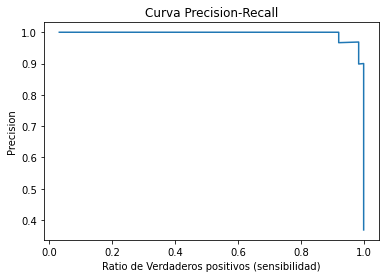

In [47]:
rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");
plt.show()

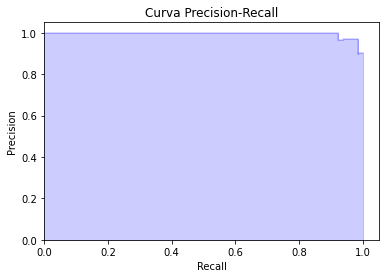

In [48]:
#RATIOS DE CURVAS 
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color='b', alpha=0.2,
         where='post')
    plt.fill_between(recall_, precision_, step='post', alpha=0.2,
                 color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()

grafica_precision_recall(clases_reales, predicciones_probabilidades)

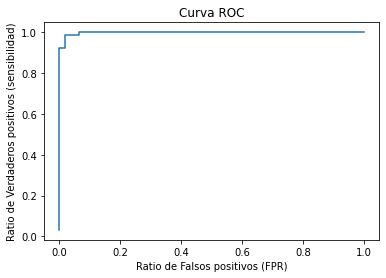

ROC:  0.958994708994709


In [49]:
plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");
plt.show()
print("ROC: ",metrics.roc_auc_score(clases_reales, predicciones))

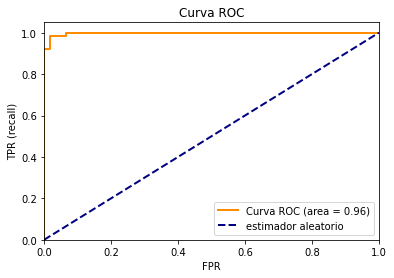

In [50]:
#CURVA AUC
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

#LA CURVA ROC DEBE QUEDAR ENCIMA DE LA DIAGONAL
grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)


In [51]:
#UN RESUMEN DE LOS RESULTADOS
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("Resumen de los resultados");
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)

Resumen de los resultados

    Exactitud: 0.965
    Precisión: 0.929
    Sensibilidad: 0.937
    Area bajo curva (AUC): 0.959
    Puntuación F1: 0.952
    


In [52]:
#DECISION DEL UMBRAL

import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LogisticRegression(solver="liblinear")

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

probas = modelo.predict_proba(X_test)[:5]
probas

array([[8.15714037e-01, 1.84285963e-01],
       [4.18623336e-09, 9.99999996e-01],
       [2.28634155e-03, 9.97713658e-01],
       [9.96494209e-01, 3.50579099e-03],
       [9.99045853e-01, 9.54146911e-04]])

In [53]:
#ES UNA MEDIDA QUE MIDE EL COSTO DE LOS FALSOS NEGATIVOS Y POSITIVOS
def softmax(coste_fp, coste_fn):
    return np.exp(coste_fp) / (np.exp(coste_fn)+np.exp(coste_fp))

coste_fn = 3
coste_fp = 5
print("Softmax: ", softmax(coste_fp, coste_fn))

Softmax:  0.8807970779778824


In [54]:
@interact
def calculo_umbral(
    coste_fp=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
    coste_fn=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
):
    return softmax(coste_fp, coste_fn)

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…

In [55]:
#LA CLASE QUE DECIDE
class BusinessLogisticRegression(LogisticRegression):
        
    def decision_de_negocio(self, X, coste_fp=1, coste_fn=1, *args, **kwargs):
        probs = self.predict_proba(X)
        umbral_decision = calculo_umbral(coste_fp, coste_fn)
        print("Umbral de decision: {}".format(umbral_decision))
        decisiones = probabilidades_a_clases(probs, umbral_decision)
        return decisiones
        
modelo_negocio = BusinessLogisticRegression(solver="liblinear")

modelo_negocio.fit(X_train, y_train)

BusinessLogisticRegression(solver='liblinear')

In [56]:
@interact(
    coste_fp=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.),
    coste_fn=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.)
)
def decision_negocio(coste_fp, coste_fn):
    predicciones = modelo_negocio.decision_de_negocio(X_test, coste_fp, coste_fn)
    print(confusion_matrix(clases_reales, predicciones))

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…